# 0. Download Dataset

In [1]:
import pandas as pd

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"braveseokyung","key":"ef9e9f7c74e2a8337292d50296609c45"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

#Warning: Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /root/.kaggle/kaggle.json'
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 1.87MB/s]


In [5]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 1. EDA

## 변수

* target variable (categorical)   
```survival```	Survival	0 = No, 1 = Yes

* explanatory variables   
```passengerId```   
```pclass```	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd   
```sex```	Sex	
```Age```	Age in years	
```sibsp```	# of siblings / spouses aboard the Titanic	
```parch```	# of parents / children aboard the Titanic	
```ticket```	Ticket number	
```fare```	Passenger fare	
```cabin```	Cabin number	
```embarked```	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton





In [291]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [7]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data_train.info() # 결측치 'Age', 'Cabin', 'Embarked'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data_train[data_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [22]:
data_train[data_train.duplicated(['Name','Sex','Age'])] # 중복 데이터 없음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## 변수별 EDA

In [25]:
import seaborn as sns #https://www.kaggle.com/code/fourbic/visualizing-the-titanic-data-with-seaborn
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [21]:
data_train.columns.unique() # 전체 column 이름 보기

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0    549
1    342
Name: Survived, dtype: int64


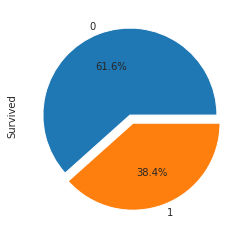

In [63]:
# 'Survived' : categorical
print(data_train['Survived'].value_counts())
data_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


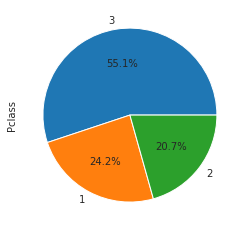

In [64]:
# Pclass : categorical
print(data_train['Pclass'].value_counts())
data_train['Pclass'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

male      577
female    314
Name: Sex, dtype: int64


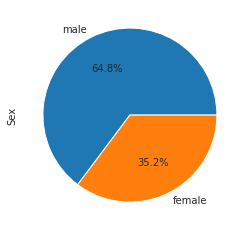

In [65]:
# Sex : categorical
print(data_train['Sex'].value_counts())
data_train['Sex'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


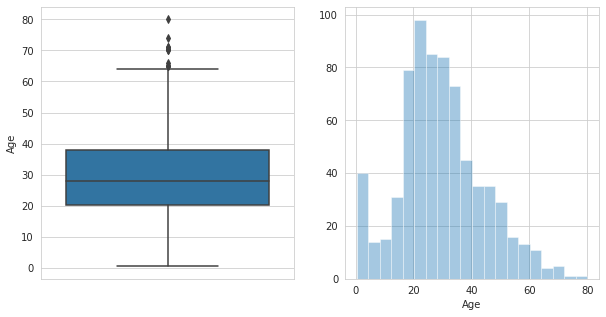

In [78]:
# Age : numeric
fig, ax= plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(y='Age',data=data_train,ax=ax[0])
sns.distplot(data_train['Age'],ax=ax[1],kde=False)
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


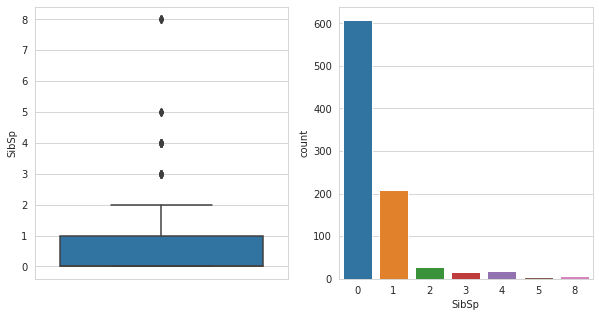

In [90]:
# 'Sibsp' : numeric
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(y=data_train['SibSp'],ax=ax[0])
sns.countplot(data_train['SibSp'],ax=ax[1]) # 변수가 항상 정수값이므로 distplot 말고 countplot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


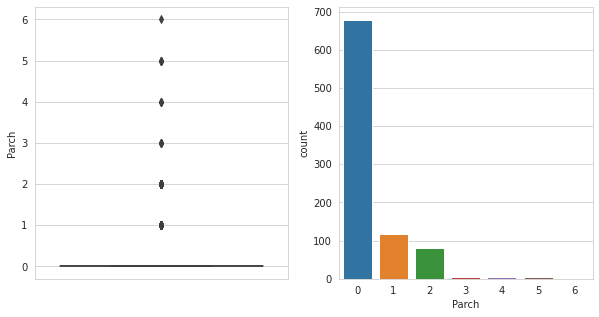

In [91]:
# 'Parch' : numeric
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(y=data_train['Parch'],ax=ax[0])
sns.countplot(data_train['Parch'],ax=ax[1])
plt.show()

In [87]:
# 'Ticket' : categorical
data_train['Ticket'].nunique() # 사실상 고유값

681

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


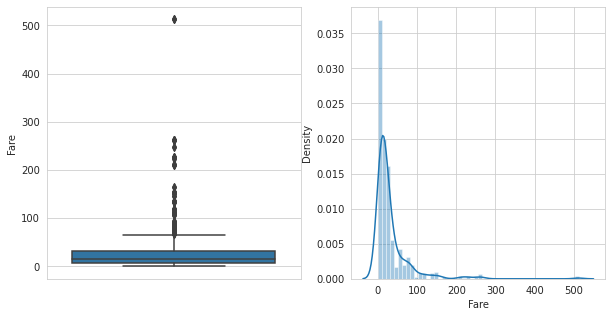

In [92]:
# 'Fare' : numeric
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(y=data_train['Fare'],ax=ax[0])
sns.distplot(data_train['Fare'],ax=ax[1]) # Skewed 
plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


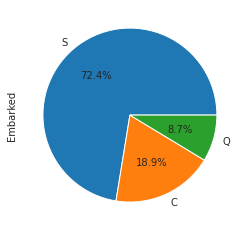

In [94]:
# 'Embarked' : categorical
print(data_train['Embarked'].value_counts())
data_train['Embarked'].value_counts().plot.pie(autopct='%.1f%%')

## 변수간 EDA
* categorical : ['Survived' , 'Pclass' ,  'Sex' , 'Embarked'] - target variable 'Survived'를 이용해도 되나?
* numberic : ['Age', 'SibSp', 'Parch' , 'Fare']

Text(0.5, 1.0, 'heatmap')

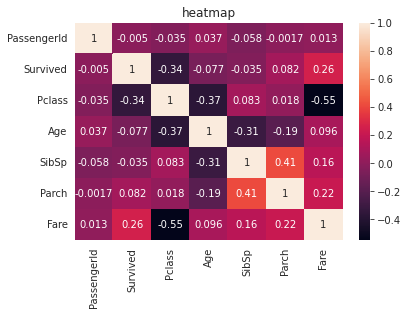

In [96]:
# heatmap
sns.heatmap(data_train.corr(),annot=True) # 변수간 correlation 값이 낮음
plt.title('heatmap')

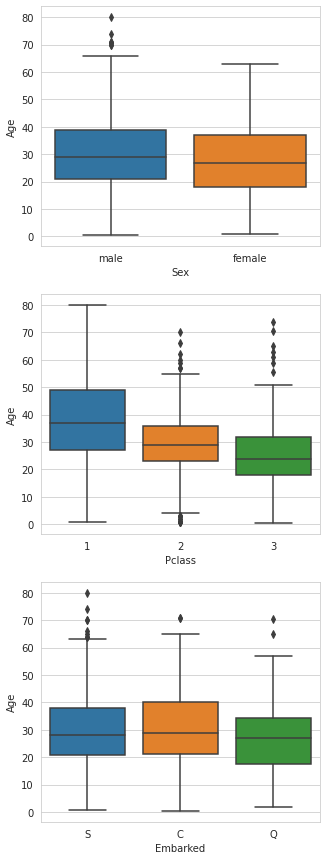

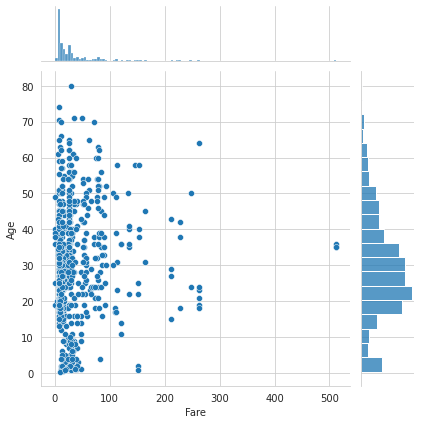

In [136]:
# 'Age' 가 y축

fig,ax=plt.subplots(nrows=3,figsize=(5,15))
# 'Age' and 'Sex'
sns.boxplot(x='Sex',y='Age',data=data_train,ax=ax[0])
# 'Age' and 'Pclass'
sns.boxplot(x='Pclass',y='Age',data=data_train,ax=ax[1])
# 'Age' and 'Embarked'
sns.boxplot(x='Embarked',y='Age',data=data_train,ax=ax[2])
# 'Age' and 'Fare'
sns.jointplot(x='Fare',y='Age',data=data_train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


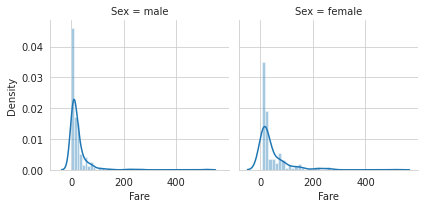

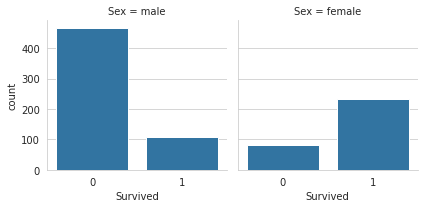

In [137]:
# 'sex' and 'Fare'
fig_sex_fare=sns.FacetGrid(data=data_train,col='Sex')
fig_sex_fare.map(sns.distplot,'Fare')
# 'sex' and 'Survived'
fig_sex_survived=sns.FacetGrid(data=data_train, col='Sex')
fig_sex_survived.map(sns.countplot,'Survived')
plt.show()

# 2. Data Preprocssing

고려사항
* 불필요한 columns : ['PassengerId' , 'Name' , 'Ticket' , 'Cabin']
* 'Age' 결측치 처리
* 'SibSp' , 'Parch' 처럼 정수 numeric인 경우, categorical로 처리해야 할까? 
* 'SibSp' , 'Parch'가 의미상 동일하다고 판단 -> 합쳐줌
* categorical 변수 ['Pclass' , 'Sex' , 'Embarked'] 처리 
* 'Fare' 가 한쪽으로 치우쳐 있음 -> 표준화
* 모든 numeric 변수의 range를 맞춰줘야 할까?
* 변수간 EDA의 의미를 correlation 빼고는 잘 모르겠음

In [348]:
# dataset copy
train=data_train.copy()
X_train=train.drop(columns='Survived')

In [349]:
# 불필요한 column 제거('PassengerId', 'Name', 'Ticket', 'Cabin')

# 'PassengerId' : 단순 인덱스
# 'Name' : 고유값
# 'Ticket' : 고유값 (891개 중 681개가 unique)
# 'Cabin' : 결측치가(전체 데이터의 약 80%) 너무 많아서 제거하는 게 낫다고 판단

X_train=X_train.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [350]:
# categorical 변수 ['Pclass' , 'Sex' , 'Embarked'] 처리

# 'Sex','Embarked' 처리
X_train=pd.get_dummies(X_train) # 'Pclass' 는 dtype int 이므로 get_dummies로 처리되지 않음 

In [351]:
# 'Pclass' 처리 https://lucian-blog.tistory.com/49
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()

Pclass_onehot=encoder.fit_transform(X_train[['Pclass']]) # 인지로 2차원 배열을 받음

Pclass_onehot=pd.DataFrame(Pclass_onehot.toarray())
Pclass_onehot.columns='Pclass_'+encoder.get_feature_names()

# 원본 데이터 병합
X_train=pd.concat([X_train,Pclass_onehot],axis=1)
X_train=X_train.drop(columns='Pclass')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [352]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          714 non-null    float64
 1   SibSp        891 non-null    int64  
 2   Parch        891 non-null    int64  
 3   Fare         891 non-null    float64
 4   Sex_female   891 non-null    uint8  
 5   Sex_male     891 non-null    uint8  
 6   Embarked_C   891 non-null    uint8  
 7   Embarked_Q   891 non-null    uint8  
 8   Embarked_S   891 non-null    uint8  
 9   Pclass_x0_1  891 non-null    float64
 10  Pclass_x0_2  891 non-null    float64
 11  Pclass_x0_3  891 non-null    float64
dtypes: float64(5), int64(2), uint8(5)
memory usage: 53.2 KB


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


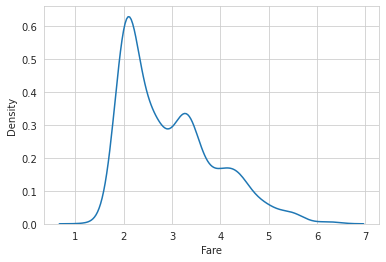

In [292]:
# 'Fare' skewedness 해결
# import numpy as np
# from scipy import stats
# log_fare=np.log(train['Fare']) # 로그화
# sns.kdeplot(log_fare)

# train['Fare']=log_fare

# 이상치 제거
# q1,q3=np.percentile(train['Fare'],[25,75])
# iqr=q3-q1
# lower_bound=q1-3*iqr
# upper_bound=q3+10*iqr
# train[train['Fare']>upper_bound]

In [353]:
# 'SibSp'와 'Parch' 를 합친 'Family' 변수 추가, 원래 변수 삭제 
X_train['Family']=X_train['SibSp']+X_train['Parch']
X_train=X_train.drop(columns=['SibSp','Parch'])

In [231]:
# 'Age' 결측치 각 'Pclass'의 mean으로 채워줌
train['Age']=data_train.copy()['Age']
Pclass_1=train[train['Pclass']==1]['Age'].mean()
Pclass_2=train[train['Pclass']==2]['Age'].mean()
Pclass_3=train[train['Pclass']==3]['Age'].mean()
print('Pclass 1:', Pclass_1)
print('Pclass 2:',Pclass_2)
print('Pclass 3;',Pclass_3)

# for idx, row in train[train['Age'].isna()].iterrows():
#   if(train.iloc[idx]['Pclass']==1):
#      train.iloc[idx]['Age']=Pclass_1
#   elif(train.iloc[idx]['Pclass']==2):
#      train.iloc[idx]['Age']=Pclass_2
#   else:
#      train.iloc[idx]['Age']=Pclass_3

#for row in train[train['Age'].isna()]:
#  print(row)
  # if(train.iloc[row]['Pclass']==1):
  #   train['Age'].iloc[row]=Pclass_1
  # elif(train['Pclass'].iloc[row]==2):
  #   train['Age'].iloc[row]=Pclass_2
  # else:
  #   train['Age'].iloc[row]=Pclass_3

train['Age'][train['Pclass']==1].isn
# train['Age'][train['Pclass']==1].fillna(Pclass_1,inplace=True)
# train['Age'][train['Pclass']==2].fillna(Pclass_2,inplace=True)
# train['Age'][train['Pclass']==3].fillna(Pclass_3,inplace=True)
#train['Age'].fillna(Pclass_1 if train['Pclass']==1 else Pclass_2 if train['Pclass']==2 else Pclass_3)

Pclass 1: 38.233440860215055
Pclass 2: 29.87763005780347
Pclass 3; 25.14061971830986


1      False
3      False
6      False
11     False
23     False
       ...  
871    False
872    False
879    False
887    False
889    False
Name: Age, Length: 216, dtype: bool

In [355]:
# 'Age' 결측치 제거 방법 2 : KNN
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)

filled_train=imputer.fit_transform(X_train)
X_train=pd.DataFrame(filled_train,columns=X_train.columns)

In [356]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Fare         891 non-null    float64
 2   Sex_female   891 non-null    float64
 3   Sex_male     891 non-null    float64
 4   Embarked_C   891 non-null    float64
 5   Embarked_Q   891 non-null    float64
 6   Embarked_S   891 non-null    float64
 7   Pclass_x0_1  891 non-null    float64
 8   Pclass_x0_2  891 non-null    float64
 9   Pclass_x0_3  891 non-null    float64
 10  Family       891 non-null    float64
dtypes: float64(11)
memory usage: 76.7 KB


# 3. Train and Test

In [347]:
# Test 데이터도 똑같이 전처리
test=data_test.copy()
test=test.drop(columns=['PassengerId','Name','Ticket','Cabin'])
test=pd.get_dummies(test)

encoder=OneHotEncoder()

Pclass_onehot=encoder.fit_transform(test[['Pclass']]) # 인지로 2차원 배열을 받음

Pclass_onehot=pd.DataFrame(Pclass_onehot.toarray())
Pclass_onehot.columns='Pclass_'+encoder.get_feature_names()
test=pd.concat([test,Pclass_onehot],axis=1)
test=test.drop(columns='Pclass')

#test['Fare']=np.log(test['Fare'])

test['Family']=test['SibSp']+test['Parch']
test=test.drop(columns=['SibSp','Parch'])

imputer=KNNImputer(n_neighbors=5)

filled_test=imputer.fit_transform(test)
test=pd.DataFrame(filled_test,columns=test.columns)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Fare         418 non-null    float64
 2   Sex_female   418 non-null    float64
 3   Sex_male     418 non-null    float64
 4   Embarked_C   418 non-null    float64
 5   Embarked_Q   418 non-null    float64
 6   Embarked_S   418 non-null    float64
 7   Pclass_x0_1  418 non-null    float64
 8   Pclass_x0_2  418 non-null    float64
 9   Pclass_x0_3  418 non-null    float64
 10  Family       418 non-null    float64
dtypes: float64(11)
memory usage: 36.0 KB


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [358]:
from sklearn.linear_model import LogisticRegression
# X_train=train.drop(columns='Survived')
y_train=train['Survived']
#X_test=test.drop(columns='PassengerId')

model_lr=LogisticRegression(max_iter=10000)
model_lr.fit(X_train,y_train)

y_pred=model_lr.predict(test)
y_pred.shape

submission=pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':y_pred}).set_index('PassengerId')
submission.to_csv('sub.csv')
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
